<font size= 6> *Predição de inadimplência-(cartão de credito)*

In [1]:
#Predição de inadimplência, baseado no dataset com dados históricos de pagamentos : default of credit card clients.xls
#disponível em: UCI Machine Learning Repository
#https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


In [1]:
#importa bibliotecas iniciais:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [2]:
# importa dados históricos de pagamentos:

df0 = pd.read_excel('default of credit card clients.xls',skiprows=1)

<font size= 4> *Análise exploratória e tratamento dos dados :*

In [3]:
df0.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
# criação de novo dataset sem a coluna 'ID':
df1 = df0.drop('ID',axis=1)

In [6]:
#renomeando a variável independente 'default payment next month':
df1.rename(columns={'default payment next month':'Y_PAY'},inplace= True)

In [7]:
#verificando valores null e shape:
df1.head()
df1.isnull().sum()
df1.shape

(30000, 24)

In [8]:
#describe variáveis quantitativas:
df1.iloc[:,np.r_[11:22]].describe()
df1.iloc[:,[11,17,12,18,13,19,14,20,15,21,16,22]].describe()

,BILL_AMT1,PAY_AMT1,BILL_AMT2,PAY_AMT2,BILL_AMT3,PAY_AMT3,BILL_AMT4,PAY_AMT4,BILL_AMT5,PAY_AMT5,BILL_AMT6,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,51223.330900,5663.580500,49179.075167,5.921163e+03,4.701315e+04,5225.68150,43262.948967,4826.076867,40311.400967,4799.387633,38871.760400,5215.502567
std,73635.860576,16563.280354,71173.768783,2.304087e+04,6.934939e+04,17606.96147,64332.856134,15666.159744,60797.155770,15278.305679,59554.107537,17777.465775
min,-165580.000000,0.000000,-69777.000000,0.000000e+00,-1.572640e+05,0.00000,-170000.000000,0.000000,-81334.000000,0.000000,-339603.000000,0.000000
25%,3558.750000,1000.000000,2984.750000,8.330000e+02,2.666250e+03,390.00000,2326.750000,296.000000,1763.000000,252.500000,1256.000000,117.750000
50%,22381.500000,2100.000000,21200.000000,2.009000e+03,2.008850e+04,1800.00000,19052.000000,1500.000000,18104.500000,1500.000000,17071.000000,1500.000000
75%,67091.000000,5006.000000,64006.250000,5.000000e+03,6.016475e+04,4505.00000,54506.000000,4013.250000,50190.500000,4031.500000,49198.250000,4000.000000
max,964511.000000,873552.000000,983931.000000,1.684259e+06,1.664089e+06,896040.00000,891586.000000,621000.000000,927171.000000,426529.000000,961664.000000,528666.000000


In [9]:
#describe variáveis qualitativas
df1[['SEX','EDUCATION','MARRIAGE','AGE']].describe()

,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


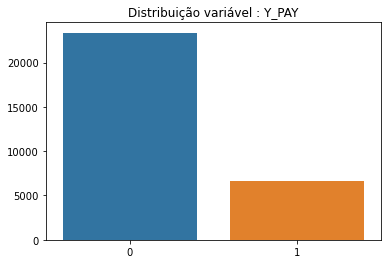

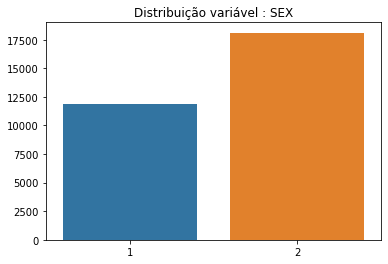

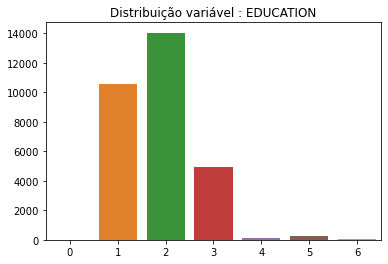

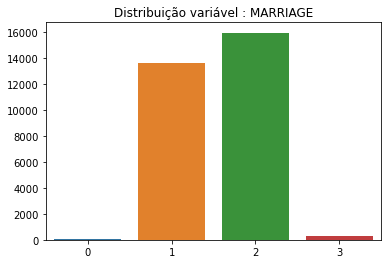

In [10]:

ngraf = (df1.loc[:,['Y_PAY','SEX','EDUCATION','MARRIAGE']]).columns
for i in ngraf:
    a = df1[i].value_counts()
    sns.barplot(x =a.index,y=a.values )
    plt.title( 'Distribuição variável : '+ i)
    plt.show()

In [11]:
# A proporção de adimplentes(1) e inadimplentes (0) mostra um dataset desbalanceado:
df1.Y_PAY.value_counts().div(df1.Y_PAY.count())

0    0.7788
1    0.2212
Name: Y_PAY, dtype: float64

In [12]:
 #Importando split (treino e teste) e package para resample
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [13]:
# Split dataset(Treino e Teste):
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Y_PAY',axis=1),df1['Y_PAY'],random_state =0)

In [14]:
#concatenando bases de treino para resample:
df_training = pd.concat([X_train,y_train],axis=1)

In [15]:
#separando adimplentes e inadimplentes( classes: minoritária e majoritária):
df_minor_adimplentes   = df_training[df_training.Y_PAY == 1]
df_major_inadimplentes = df_training[df_training.Y_PAY == 0]

In [16]:
print(df_minor_adimplentes.Y_PAY.value_counts())
print(df_major_inadimplentes.Y_PAY.value_counts())

1    5004
Name: Y_PAY, dtype: int64
0    17496
Name: Y_PAY, dtype: int64


In [17]:
#resample base de adimplentes(Oversampling: duplica amostras da classe minoritária )
df_adimplentes_oversampled = resample(df_minor_adimplentes,
                              replace =True,
                              n_samples = len(df_major_inadimplentes),
                              random_state =123
                             )

In [18]:
print(df_adimplentes_oversampled.Y_PAY.value_counts())

1    17496
Name: Y_PAY, dtype: int64


In [19]:
#concatenando bases de treino para resample:
df2 = pd.concat([df_adimplentes_oversampled,df_major_inadimplentes])

In [20]:
df2.Y_PAY.value_counts()

1    17496
0    17496
Name: Y_PAY, dtype: int64

In [21]:
#Separar base resample (X,y) 
X_train_oversampled  = df2.drop('Y_PAY',axis=1)
y_train_oversampled = df2['Y_PAY']

<font size= 4> *Criação,predição e avaliação dos Modelos (Logistic Regression,Kneighbors classifier) :*

In [22]:
#importando modelo para Regressão Logística:
from sklearn.linear_model import LogisticRegression

In [23]:
# suprimindo avisos:
import warnings
warnings.filterwarnings('ignore')

In [24]:
#instanciando o modelo:
lr_over = LogisticRegression()

In [25]:
#treinando o modelo:
lr_over.fit(X_train_oversampled,y_train_oversampled)

LogisticRegression()

In [26]:
#obtendo acurácia do modelo:
lr_score_over = lr_over.score(X_test,y_test)

In [27]:
print(lr_score_over)

0.6209333333333333


In [28]:
#importando modelo:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#instanciando o modelo:
knn_over = KNeighborsClassifier(n_neighbors=2)

In [30]:
#treinando o modelo:
knn_over.fit(X_train_oversampled,y_train_oversampled)

KNeighborsClassifier(n_neighbors=2)

In [31]:
#obtendo acurácia do modelo:
knn_score_over = knn_over.score(X_test,y_test)

In [32]:
print(knn_score_over)

0.7105333333333334


In [33]:
#resample base de adimplentes(Undersampling: deleta amostras da classe majoritária)
df_inadimplentes_undersampled = resample(df_major_inadimplentes,
                              replace =True,
                              n_samples = len(df_minor_adimplentes),
                              random_state =123
                             )

In [34]:
print(df_inadimplentes_undersampled.Y_PAY.value_counts())

0    5004
Name: Y_PAY, dtype: int64


In [35]:
#concatenando bases de treino para resample:
df3 = pd.concat([df_inadimplentes_undersampled,df_minor_adimplentes])

In [36]:
df3.Y_PAY.value_counts()

1    5004
0    5004
Name: Y_PAY, dtype: int64

In [37]:
#Separar base resample (X,y) 
X_train_undersampled  = df3.drop('Y_PAY',axis=1)
y_train_undersampled = df3['Y_PAY']

In [38]:
lr_under = LogisticRegression()

In [39]:
lr_under.fit(X_train_undersampled,y_train_undersampled)

LogisticRegression()

In [40]:
lr_score_under = lr_under.score(X_test,y_test)

In [41]:
print(lr_score_under)

0.6961333333333334


In [42]:
knn_under = KNeighborsClassifier(n_neighbors=2)

In [43]:
knn_under.fit(X_train_undersampled,y_train_undersampled)

KNeighborsClassifier(n_neighbors=2)

In [44]:
knn_score_under = knn_under.score(X_test,y_test)

In [45]:
print(knn_score_under)

0.6678666666666667


In [78]:
print('Acurácia, modelo LogisticRegression   (dados over  sampled):',lr_score_over)
print('Acurácia, modelo LogisticRegression   (dados under sampled):',lr_score_under)
print('Acurácia, modelo KNeighborsClassifier (dados over  sampled):',knn_score_over)
print('Acurácia, modelo KNeighborsClassifier (dados under sampled):',knn_score_under)

Acurácia, modelo LogisticRegression   (dados over  sampled): 0.6209333333333333
Acurácia, modelo LogisticRegression   (dados under sampled): 0.6961333333333334
Acurácia, modelo KNeighborsClassifier (dados over  sampled): 0.7105333333333334
Acurácia, modelo KNeighborsClassifier (dados under sampled): 0.6678666666666667
